## Imports & paths definition

In [13]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

In [14]:
x_train_path = 'train/training_set_clean_only_text.txt'
y_train_path = 'train/training_set_clean_only_tags.txt'

x_test_path = 'test/test_set_only_text.txt'
y_test_path = 'test/test_set_only_tags.txt'

## Reading train data

In [17]:
with open(x_train_path, 'r') as file:
    _xtr = file.readlines()

xtr = []
for tweet in _xtr:
    preprocessed_tweet = " ".join(
        [_ for _ in re.split('\n| |\t', tweet) if _ not in ("@anonymized_account", "")]
    )
    preprocessed_tweet.replace('.@anonymized_account', '')
    if '@' in preprocessed_tweet:
        print(preprocessed_tweet)
    xtr.append(preprocessed_tweet)



with open(y_train_path, 'r') as file:
    ytr = file.readlines()


train_df = pd.DataFrame({"y": ytr, "x": xtr})
train_df = train_df.astype({'y': 'int32', "x": "str"})

.@anonymized_account pojawił się na TT. To konto to nie fejk. \nDołączajcie :) 💪
RT .@anonymized_account pojawił się na TT. To konto to nie fejk. \nDołączajcie :) 💪
Nowe chodnikowe powiedzonko brzmi:\n\nPierdolisz jak Morawiecki, realy.\n\n@anonymized_account \n\nHybryda głupoty.
RT Nowe chodnikowe powiedzonko brzmi:\n\nPierdolisz jak Morawiecki, realy.\n\n@anonymized_account \n\nHybryda głupoty.
.@anonymized_account Będziemy realizować przekop Mierzei Wiślanej \n#wieszwiecej \nhttps://t.co/zuCXxG1GUr
RT .@anonymized_account Będziemy realizować przekop Mierzei Wiślanej \n#wieszwiecej \nhttps://t.co/zuCXxG1GUr
problemem jest to że jak sobie coś ubzdurasz to myślisz że zawsze masz racje bo jesteś wszechwiedzący@anonymized_account
a co jesteś jego agentem że taki poinformowany ? 😂@anonymized_account
to ty chłopie nie płacz że mamy takie legendy.A wy macie kogo ? PiotraBanie ?@anonymized_account
.@anonymized_account prof. Z. #Krysiak - 21:50 #BezRetuszu zapraszamy!
RT .@anonymized_account 

In [4]:
train_df.describe()

,y
count,10041.000000
mean,0.144308
std,0.492564
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


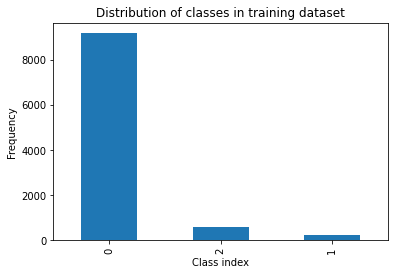

In [5]:
fig, ax = plt.subplots()
train_df['y'].value_counts().plot(ax=ax, kind='bar')
ax.set_ylabel('Frequency')
ax.set_xlabel('Class index')
ax.set_title('Distribution of classes in training dataset')
plt.show()

## Reading test data

In [6]:
with open(x_test_path, 'r') as file:
    _xte = file.readlines()

xte = []
for tweet in _xte:
    preprocessed_tweet = " ".join(
        [_ for _ in re.split('\n| |\t', tweet) if _ not in ("@anonymized_account", "")]
    )
    xte.append(preprocessed_tweet)



with open(y_test_path, 'r') as file:
    yte = file.readlines()


test_df = pd.DataFrame({"y": yte, "x": xte})
test_df = test_df.astype({'y': 'int32', "x": "str"})

In [7]:
test_df.describe()

,y
count,1000.000000
mean,0.243000
std,0.634313
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


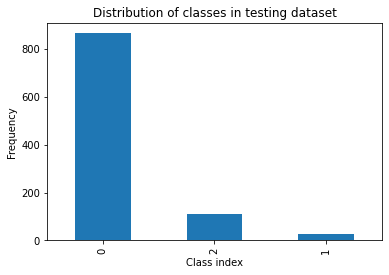

In [8]:
fig, ax = plt.subplots()
test_df['y'].value_counts().plot(ax=ax, kind='bar')
ax.set_ylabel('Frequency')
ax.set_xlabel('Class index')
ax.set_title('Distribution of classes in testing dataset')
plt.show()